In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Supervised Learning - Regression Task

In [11]:
advertising = pd.read_csv("Advertising.csv")

In [12]:
advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
advertising.drop(["Unnamed: 0"],axis=1,inplace=True)

In [14]:
advertising

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
advertising.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

It seems there is no nan value

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [176]:
X = advertising.iloc[:,:1]
y = advertising.iloc[:,3:]

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [380]:
X_train.shape

(160, 1)

# Linear Regression

In [227]:
def plotLine(fig,X, y, W, b, label_x=None, label_y=None,title=None):
    
    fig, ax = plt.subplots(1,1);
    
    ax.plot(np.array(X),np.array(y),'o')
    ax.plot(np.array(X),W*np.array(X)+b)

    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_title(title)
    plt.show()

In [228]:
def linearReg(X_train,X_test,y_train,y_test,criterion):
    
    dim = X_train.shape[1]
    
    #Create the model
    model = LinearRegression()
    
    #Fit the data
    model.fit(X_train,y_train)
    
    #Make predictions
    predictions = model.predict(X_test)
    
    #Calculate errors
    test_loss = criterion(predictions,y_test)
    train_loss = criterion(model.predict(X_train),y_train)
    
    
    W = model.coef_
    b = model.intercept_
    fig1 = plt.figure(figsize=(15, 10))
    fig2 = plt.figure(figsize=(15, 10))
    if dim == 1:
        plotLine(fig1,X_train,y_train,W,b,"TV","Sales","Training")
        plotLine(fig2,X_test,y_test,W,b,"TV","Sales","Test")
    
    print("Train Loss:",test_loss)
    print("Test Loss:",train_loss)
    

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

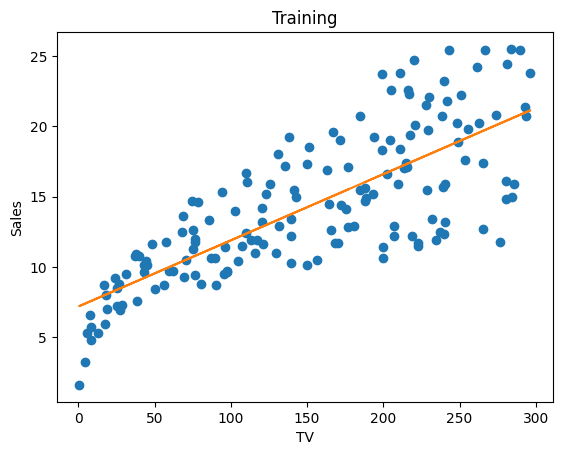

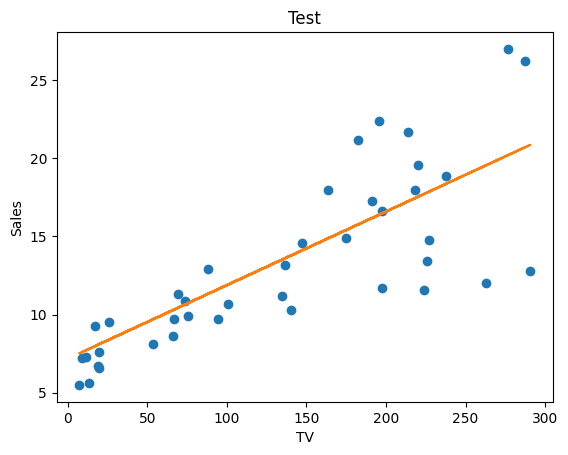

Train Loss: 10.964396153052112
Test Loss: 10.409231781616606


In [229]:
linearReg(X_train,X_test,y_train,y_test,criterion=mean_squared_error)

# Polynomial Regression

In [346]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [451]:
def PolyRegression(X_train,X_test,y_train,y_test,criterion):
    
    poly=PolynomialFeatures(degree=2)
    
    X_poly_train = poly.fit_transform(X_train.values)
    X_poly_test = poly.fit_transform(X_test.values)
    
    #Create model
    poly.fit(X_poly_train,y_train)
    lin = LinearRegression()
    lin.fit(X_poly_train, y_train)
    
    
    poly_y_test_pred = lin.predict(X_poly_test)
    
    poly_y_train_pred = lin.predict(X_poly_train)
    
    
    test_loss = criterion(poly_y_test_pred,y_test)
    train_loss = criterion(poly_y_train_pred,y_train)
    
    print("Train Loss:",train_loss)
    print("Test Loss:",test_loss)
    
    
    plt.scatter(X, y, color = 'blue')
    plt.plot(X_train.values, lin.predict(poly.fit_transform(X_train.values)), color = 'red')
    plt.title('Polynomial Regression')
    plt.xlabel('Sales')
    plt.ylabel('TV')
 
    plt.show()
    

Train Loss: 10.041724693892238
Test Loss: 12.06526516785573


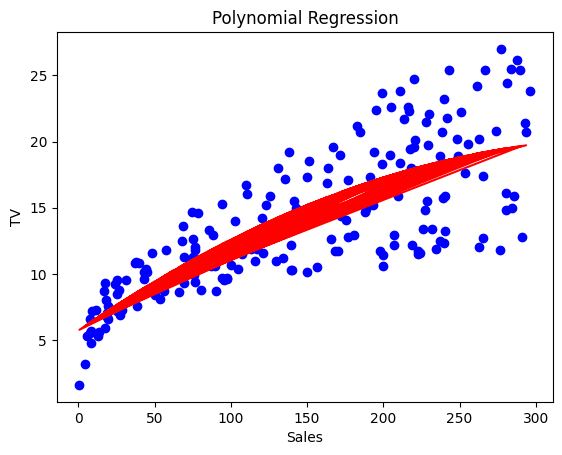

In [452]:
PolyRegression(X_train,X_test,y_train,y_test,mean_squared_error)

In [ ]:
def PolyReg(X_train,X_test,y_train,y_test,criterion):
    
    

# Support Vector Machines

In [246]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [337]:
def SVRegressor(X_train,X_test,y_train,y_test,criterion,params=None):
        
    sc = StandardScaler()

    sc_X_train = sc.fit_transform(X_train)
    sc_y_train = sc.fit_transform(y_train)
    sc_X_test = sc.fit_transform(X_test)
    sc_y_test = sc.fit_transform(y_test)
    
    if params is not None:
        svr = SVR(C=params["C"],gamma=params["gamma"],kernel=params["kernel"],epsilon=params["epsilon"])
    else:
        svr = SVR()
    svr.fit(sc_X_train,sc_y_train)
    
    y_pred = svr.predict(sc_X_test)
    y_pred = sc.inverse_transform(y_pred)
    
    test_loss = criterion(y_pred,y_test)
    train_loss = criterion(sc.inverse_transform(svr.predict(sc_X_train)),y_train)
    
    print("Test Loss:",test_loss)
    print("Train Loss:",train_loss)
    
    

In [338]:
SVRegressor(X_train,X_test,y_train,y_test,mean_squared_error)

Test Loss: 11.110688715509191
Train Loss: 11.787063833667862


In [339]:
def SVRegressor_CV(X_train,X_test,y_train,y_test):
    
    sc = StandardScaler()

    sc_X_train = sc.fit_transform(X_train)
    sc_y_train = sc.fit_transform(y_train)
    sc_X_test = sc.fit_transform(X_test)
    sc_y_test = sc.fit_transform(y_test)
    
    
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid'],
              'epsilon':[1, 0.1, 0.01]}
    
    grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = False)
    
    grid.fit(sc_X_train,sc_y_train)
    
    print("-------------------------")
    print("Results")
    print(grid.best_estimator_)
    
    
    
    return grid.best_params_

In [340]:
params = SVRegressor_CV(X_train,X_test,y_train,y_test)
SVRegressor(X_train,X_test,y_train,y_test,mean_squared_error,params)

-------------------------
Results
SVR(C=1000, epsilon=1, gamma=0.01, kernel='sigmoid')
Test Loss: 10.916872645715756
Train Loss: 12.153083706425328
